In [1]:
# Pandas for managing datasets
import pandas as pd

In [56]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt

# In Jupyter Notebook, "%matplotlib inline" can be used to display plots inside the notebook.
%matplotlib inline  

# setup configuration for the proper figure sizes
plt.rcParams['figure.figsize'] = (12,8)

In [3]:
# Seaborn for plotting and styling
import seaborn as sns

In [10]:
# Read dataset
df = pd.read_csv('Pokemon.csv', index_col=0) #,encoding='utf-8')

# Above, the argument  index_col=0 simply means that first column (colname = id)
# of the dataset will be treated as index column.

In [23]:
df.dtypes

Name         object
Type 1       object
Type 2       object
Total         int64
HP            int64
Attack        int64
Defense       int64
Sp. Atk       int64
Sp. Def       int64
Speed         int64
Stage         int64
Legendary      bool
dtype: object

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 151
Data columns (total 12 columns):
Name         151 non-null object
Type 1       151 non-null object
Type 2       67 non-null object
Total        151 non-null int64
HP           151 non-null int64
Attack       151 non-null int64
Defense      151 non-null int64
Sp. Atk      151 non-null int64
Sp. Def      151 non-null int64
Speed        151 non-null int64
Stage        151 non-null int64
Legendary    151 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 19.3+ KB


In [11]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
id,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


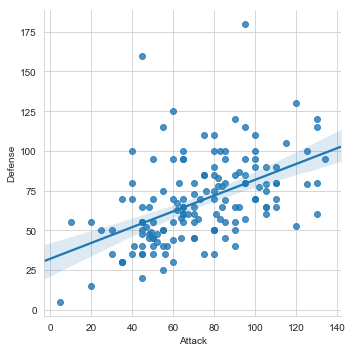

In [57]:
sns.lmplot(x='Attack', y='Defense', data=df)

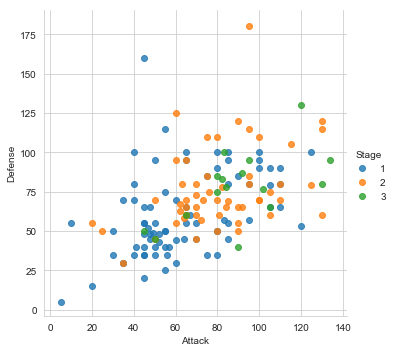

In [58]:
# Since seaborn doesn't have scatter plot, customizing to create scatter plot.
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage, another column

(0, 141.97310248937742)

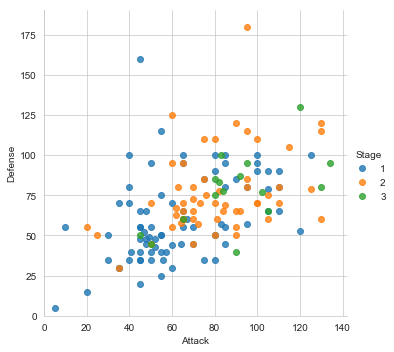

In [59]:
# Customizing with Matplotlib.

# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')

# Tweak using Matplotlib, setting axis limits.
plt.ylim(0, None)
plt.xlim(0, None)

In [15]:
df.head(3)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
id,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False


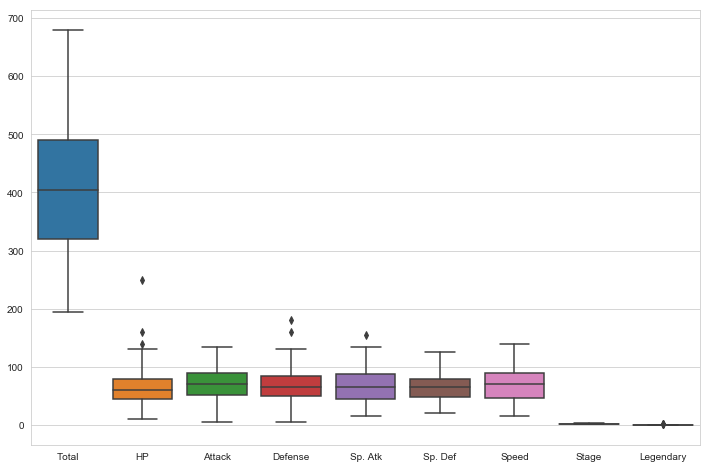

In [60]:
# Creating box plot of pokemon combat stats.

# Box plot is used to give visuals about where 50% of the data lies, but also
# Minimum, First Quartile, Median (Second Quartile), Third Quartile and Maximum

sns.boxplot(data=df)

In [73]:
# Removing some of the columns, such as Total, Staged, Legendary

stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)

# Above in dataframe axis means whether to drop labels from the index (0 or ‘index’)
# or columns (1 or ‘columns’).
stats_df.head(3)

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
id,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80


In [30]:
# 5 important statistics.
df.HP.describe()

count    151.000000
mean      64.211921
std       28.590117
min       10.000000
25%       45.000000
50%       60.000000
75%       80.000000
max      250.000000
Name: HP, dtype: float64

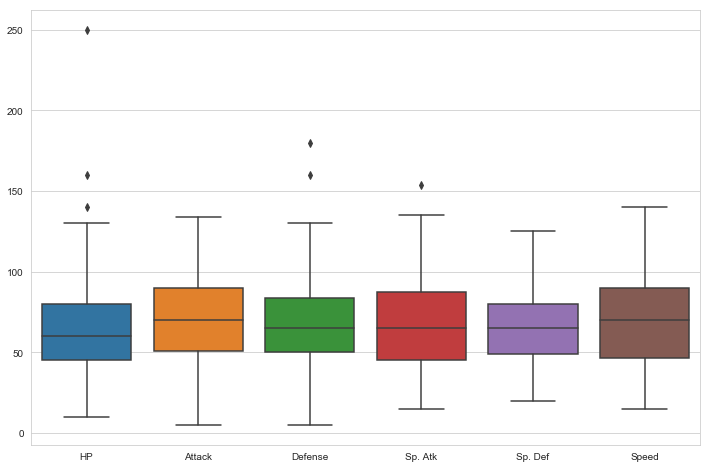

In [75]:
# Creating box plot of pokemon combat stats.

# Box plot is used to give visuals about where 50% of the data lies  but also
# i.e. 25% to 75%. Following statistics is used to depict the boxplot
# Minimum, First Quartile, Median (Second Quartile), Third Quartile and Maxim

sns.boxplot(data=stats_df)

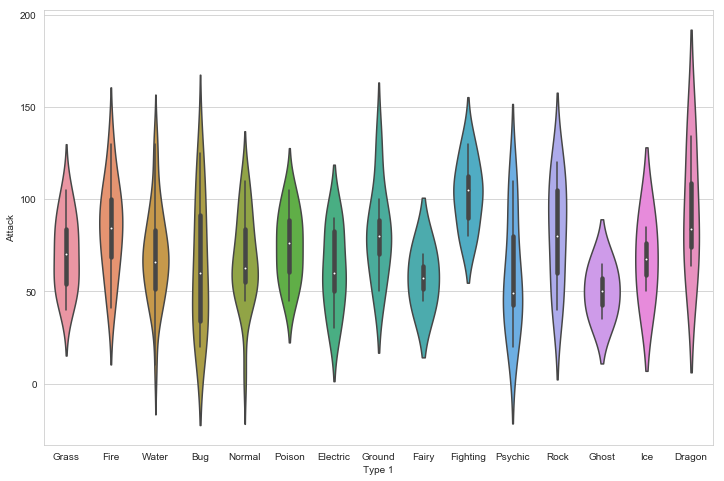

In [76]:
# Set theme, default theme is darkgrid
sns.set_style('whitegrid')
 
# Violin plot, great for distributions. Shows Dragon type pokemon has higher attack capacity
# than ghost type pokemon but also greater variance.
sns.violinplot(x='Type 1', y='Attack', data=df)

In [118]:
# to set color pallette
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

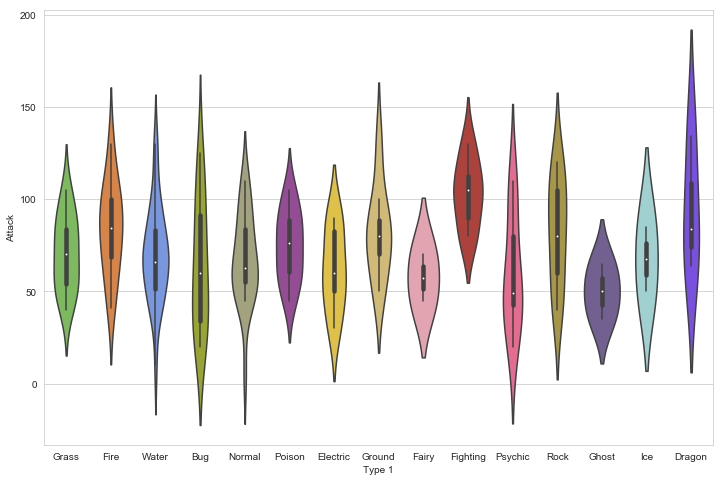

In [119]:
# Violin plot with Pokemon color palette
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette

In [ ]:
# Swarm plot, using points to visualise
# This visualization will show each point, while "stacking" those with similar values

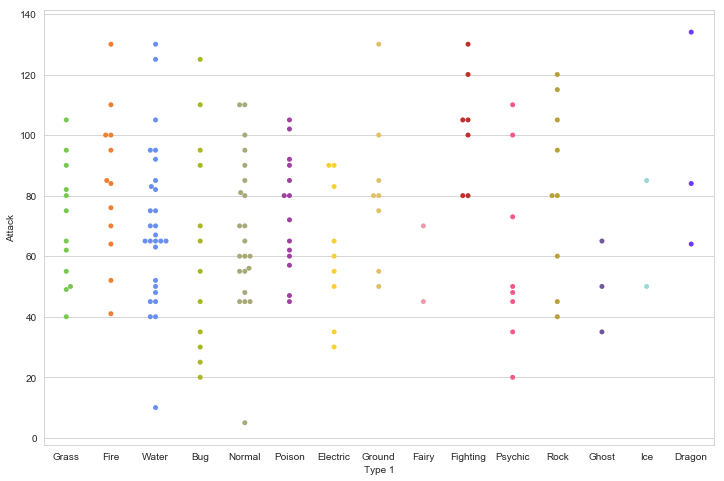

In [64]:
sns.swarmplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette

Text(0.5, 1.0, 'Attack by Type')

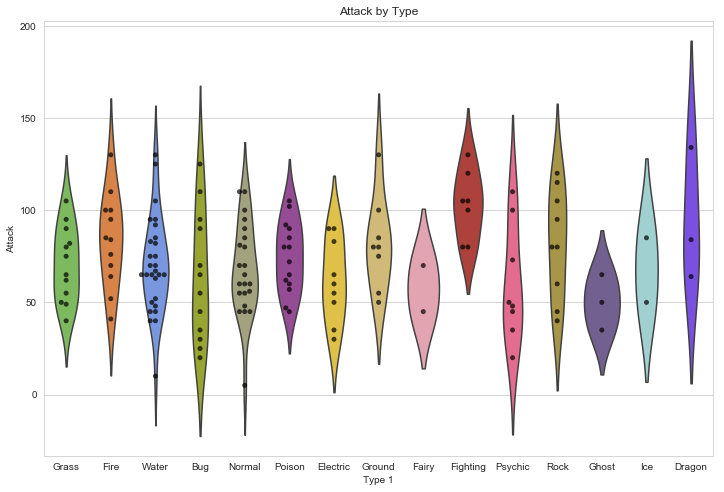

In [70]:
# overlaying plots

sns.violinplot(
    x='Type 1',
    y='Attack',
    data=df,
    inner=None, # Remove the bars inside the violins
    palette=pkmn_type_colors) # Set color palette

sns.swarmplot(
    x='Type 1',
    y='Attack',
    data=df,
    color='k', # Make points black
    alpha=0.7) # and slightly transparent

plt.title("Attack by Type")

In [77]:
# Putting all the stats together using pandas
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
id,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [79]:
#Pandas's melt() function. It takes 3 arguments:

#First, the DataFrame to melt.
#Second, ID variables to keep (Pandas will melt all of the other ones).
#Finally, a name for the new, melted variable.

melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable

# All 6 of the stat columns have been "melted" into one,
# and the new Stat column indicates the original stat 
# (HP, Attack, Defense, Sp. Attack, Sp. Defense, or Speed)

melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


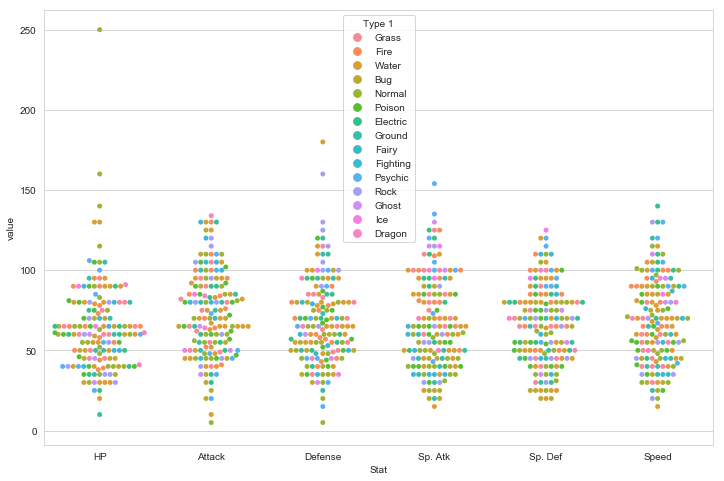

In [81]:
sns.swarmplot(
    x='Stat',
    y='value',
    data=melted_df,
     hue='Type 1')



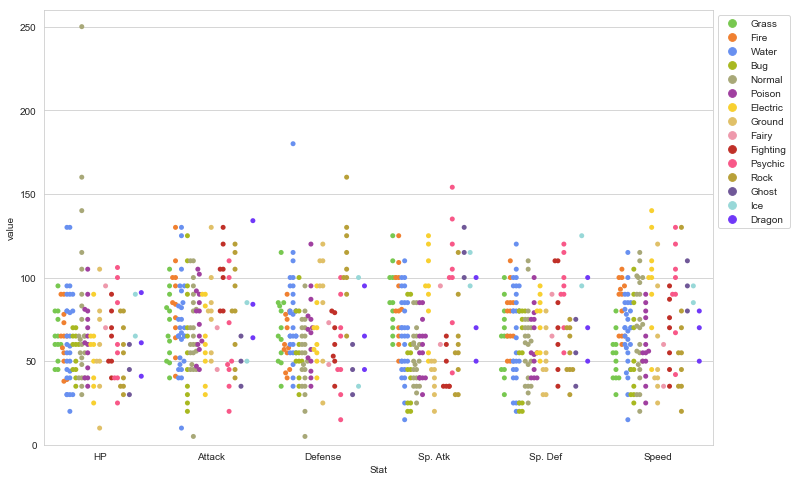

In [91]:
# improving the swarmplot

sns.swarmplot(
    x='Stat',
    y='value',
    data=melted_df,
    hue='Type 1',
    dodge=True, # Separate points by hue
    palette=pkmn_type_colors) # Use Pokemon palette

# Adjust the y-axis
plt.ylim(0, 260)

# Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

In [93]:
# Calculate correlations
corr = stats_df.corr()
corr

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.306768,0.119782,0.236649,0.490978,-0.040939
Attack,0.306768,1.000000,0.491965,0.146312,0.369069,0.194701
Defense,0.119782,0.491965,1.000000,0.187569,0.139912,-0.053252
Sp. Atk,0.236649,0.146312,0.187569,1.000000,0.522907,0.411516
Sp. Def,0.490978,0.369069,0.139912,0.522907,1.000000,0.392656
Speed,-0.040939,0.194701,-0.053252,0.411516,0.392656,1.000000


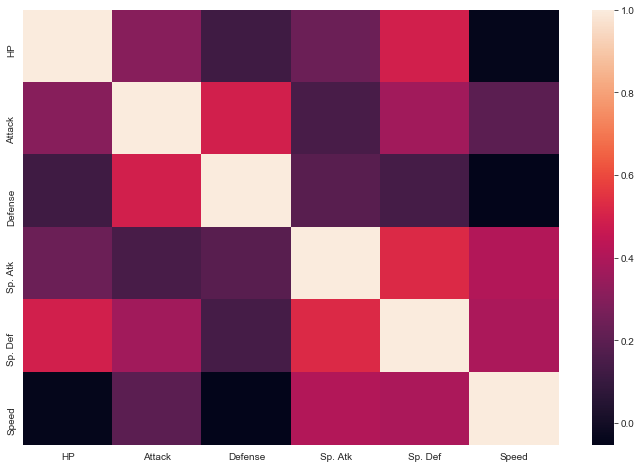

In [94]:
# Heatmap
sns.heatmap(corr)

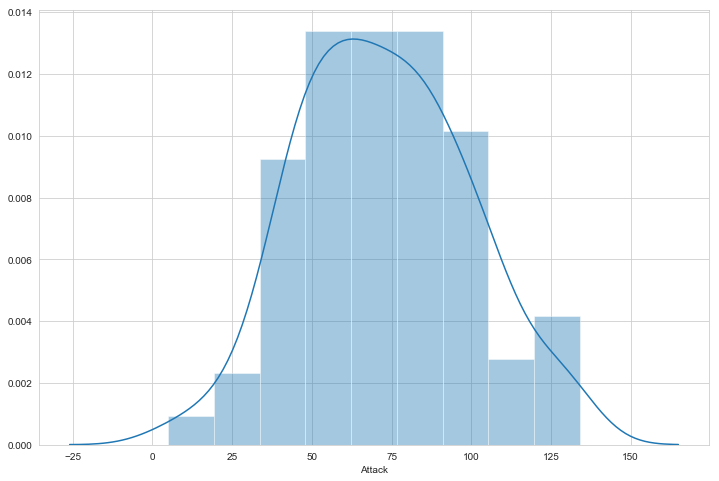

In [95]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

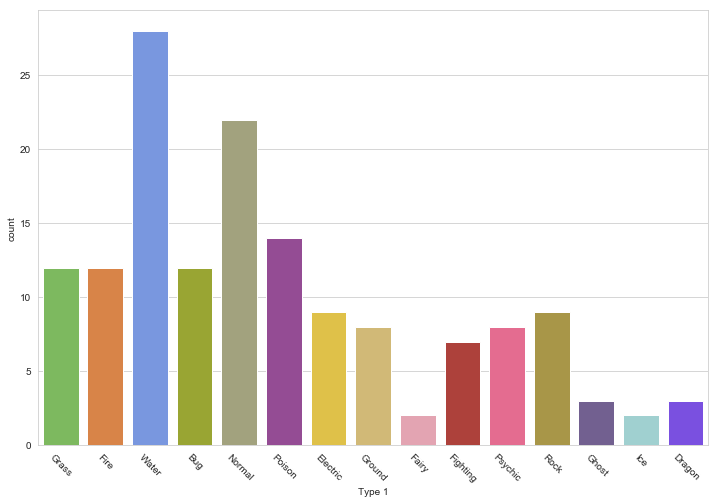

In [96]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

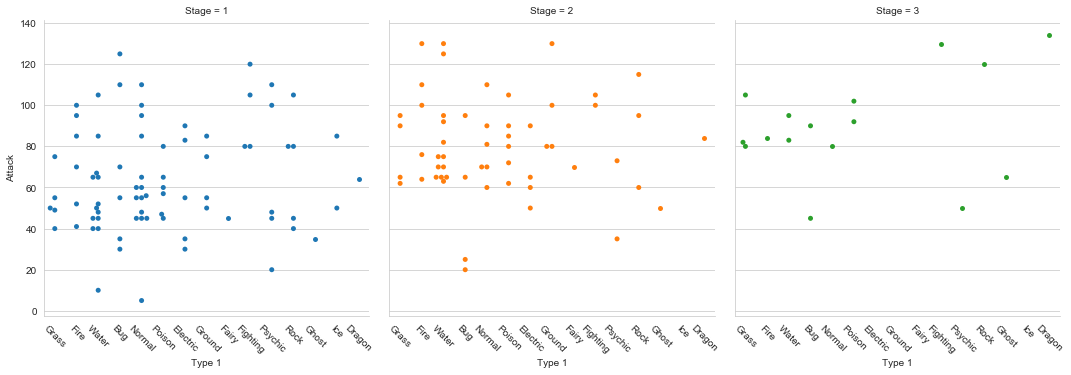

In [107]:
# Cat Plot, make it easy to separate plots by categorical classes.
g = sns.catplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
                  # kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

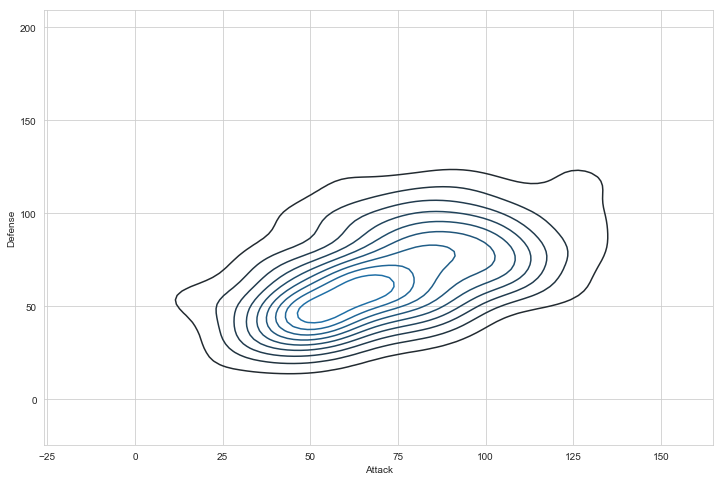

In [108]:
# Density plot, shows distribution between two variables

sns.kdeplot(df.Attack, df.Defense)

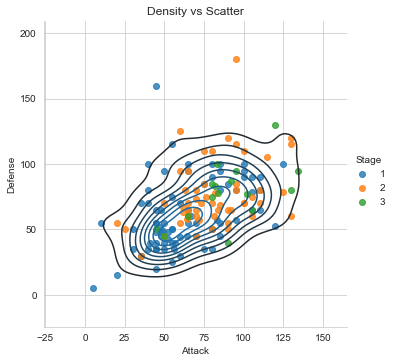

In [114]:
# Overlaying Density plot with scatter plot

sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage, another column

sns.kdeplot(df.Attack, df.Defense)

plt.title('Density vs Scatter');

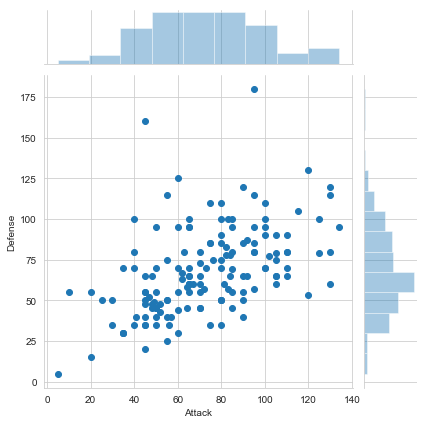

In [115]:
# Joint distribution plots combine information from scatter plots
# and histograms to give detailed information for bi-variate distributions.

sns.jointplot(x='Attack', y='Defense', data=df)